In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay

In [128]:
creditcard_df = pd.read_csv('Credit_Card.csv')
label_df = pd.read_csv('Credit_card_label.csv')
creditcard_df = pd.merge(creditcard_df, label_df, on='Ind_ID')
creditcard_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [129]:
creditcard_df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [130]:
creditcard_df = creditcard_df.drop(['Type_Occupation'], axis=1)
creditcard_df = creditcard_df.dropna()
creditcard_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


In [131]:
enc = LabelEncoder()

def encoder(column):
    creditcard_df[column] = enc.fit_transform(creditcard_df[column])

encoder('GENDER')
encoder('Car_Owner')
encoder('Propert_Owner')
encoder('Type_Income')
encoder('EDUCATION')
encoder('Marital_status')
encoder('Housing_type')

creditcard_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
6,5009754,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
7,5009894,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,1,0,0,0,2,1


In [ ]:
x = creditcard_df.drop('label', axis=1)
y = creditcard_df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [133]:
logmodel = LogisticRegression(random_state=42)
logmodel.fit(x_train,y_train)
y_pred = logmodel.predict(x_test)
logmodel.score(x_test,y_test)

0.8930957683741648

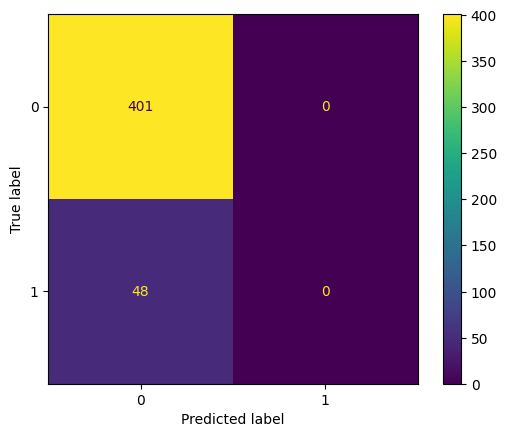

In [134]:
ConfusionMatrixDisplay.from_estimator(logmodel, x_test, y_test)

I can't find precision or recall because it didn't predict anything as a 1, but the score was pretty good.

In [135]:
creditcard_df['label'].value_counts()

label
0    1336
1     160
Name: count, dtype: int64

I am going to oversample the people who got rejected from the credit card. I found an approach online that is less naive than RandomOverSampler.

In [136]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [137]:
logmodel.fit(x_resampled, y_resampled)
y_pred = logmodel.predict(x_test)
logmodel.score(x_test,y_test)

0.6146993318485523

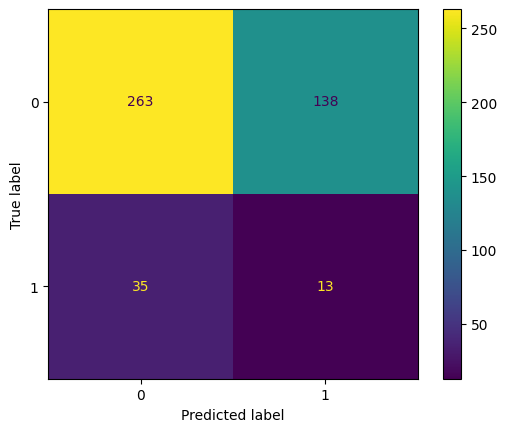

In [138]:
ConfusionMatrixDisplay.from_estimator(logmodel, x_test, y_test)

In [139]:
13/(13+35)

0.2708333333333333

It seems like oversampling might have been the wrong thing to do in this situation because the score went down and the recall is abysmal.

In [141]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

knn.score(x_test, y_test)

0.8730512249443207

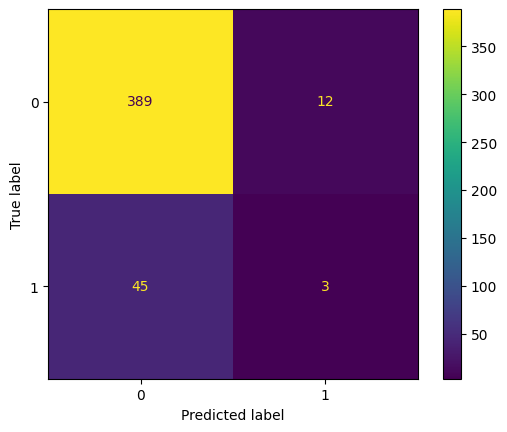

In [143]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

In [144]:
x_resampled = sc.fit_transform(x_resampled)

knn.fit(x_resampled, y_resampled)
y_pred = knn.predict(x_test)

knn.score(x_test, y_test)

0.6792873051224945

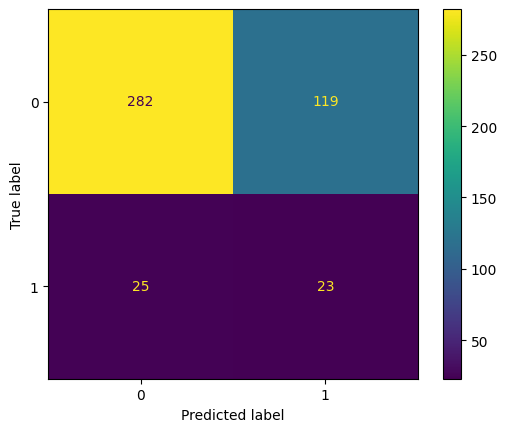

In [145]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

Oversampling also made the results of KNN worse.

In [146]:
from sklearn.metrics import roc_auc_score, roc_curve

In [147]:
roc_auc_score(y_test, y_pred)

np.float64(0.591204280964256)

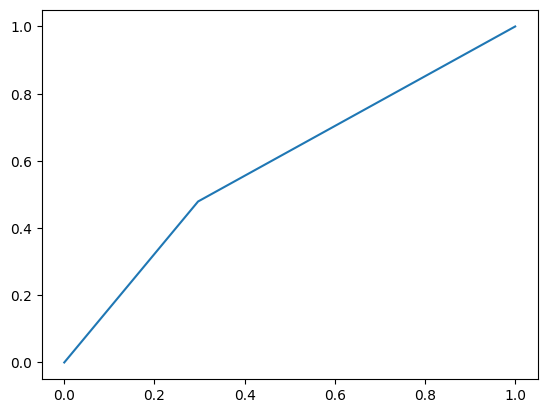

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')

In [150]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc.score(x_test, y_test)

0.8930957683741648

The SVC model score was similar to the KNN and Logistic scores before I performed oversampling on each of them.

Outlier detection is the practice of looking for any data points that are super far away from the rest of the data. Catching these early on is important because outliers can skew the outcome of your model and make the conclusion seem different. An easy method to find outliers is to consult graphs in matplotlib, like box plots, and look for anything that seems far from the rest of the data. You can also look for strange z-scores (how far the data is from the mean) or anything outside the inter-quartile range. There are also many python packages that detect outliers for you, like OneClassSvm in SKLearn.